<a href="https://colab.research.google.com/github/aRod209/pytorch-for-deep-learning/blob/main/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sun Feb 25 06:55:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch and numpy
import torch
import numpy as np

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.1.0+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

Autonomous vehicles, facial recognition, cancer detection

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is when your a machine learning model fits very well to the training data but it does not fit/generalize well to new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- Regularization: Introduces a penalty on model complexity into the loss function.
- Cross-Validation: Training a model on different folds of data ensures the model's performance is not overly dependant on a particular partition of the training data.
- More training data: More data can help the model generalize better to new data by training on more data that does not have the same outliers as existing training data but does have the same general patterns that are important to focus on.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# Import PyTorch
import torch
from torch import nn

# Import Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root='data', # where to download data to
    train=True, # create dataset from training data
    download=True, # download from internet and put in root directory
    transform=ToTensor(), # how to transform the data
    target_transform=None # how to transform the target/labels
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [7]:
image, label = train_data[0]
print(f'Image shape: {image.shape} -> [color channel, height, width]')
print(f'Image label: {train_data.classes[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color channel, height, width]
Image label: 5 - five


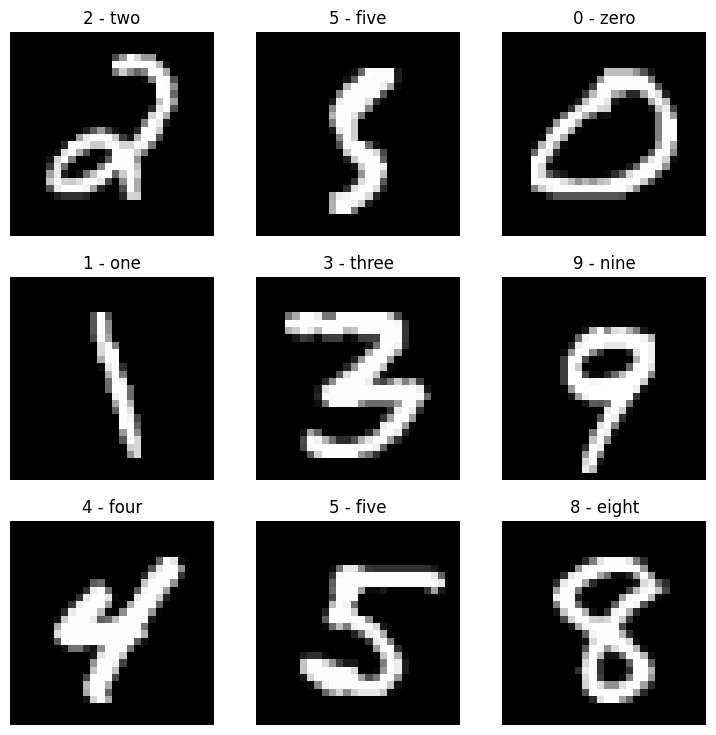

In [8]:
# Import matplotlib for visualizations
import matplotlib.pyplot as plt

torch.manual_seed(7)

fig = plt.figure(figsize=(9,9))
rows, cols = 3, 3

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=(1,)).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(train_data.classes[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [10]:
print(f'DataLoaders: {train_dataloader}, {test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoaders: <torch.utils.data.dataloader.DataLoader object at 0x7a5cc98b9780>, <torch.utils.data.dataloader.DataLoader object at 0x7a5cc989fa90>
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [11]:
class TinyVGG(nn.Module):
  """
  Model recreates the Tiny VGG model from
  the CNN Explainer website.
  Tiny VGG uses a 3x3 kernel size in convulational layers,
  with a stride of 1 and zero-padding,
  and a 2x2 kernel size in the max pool layers.

  This is different from what was actually done in the video lecture.
  """
  CONV_LAYER_KERNEL_SIZE = 3
  MAX_POOL_KERNEL_SIZE = 2
  STRIDE = 1
  PADDING = 0

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=self.CONV_LAYER_KERNEL_SIZE,
                  stride=self.STRIDE,
                  padding=self.PADDING),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=self.CONV_LAYER_KERNEL_SIZE,
                  stride=self.STRIDE,
                  padding=self.PADDING),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=self.MAX_POOL_KERNEL_SIZE)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=self.CONV_LAYER_KERNEL_SIZE,
                  stride=self.STRIDE,
                  padding=self.PADDING),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=self.CONV_LAYER_KERNEL_SIZE,
                  stride=self.STRIDE,
                  padding=self.PADDING),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=self.MAX_POOL_KERNEL_SIZE)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*4*4,
                  out_features=output_shape)
    )

  def forward(self, x):
    #print(f'Output shape of input x: {x.shape}')
    x = self.conv_block_1(x)
    #print(f'Output shape of conv_block_1: {x.shape}')
    x = self.conv_block_2(x)
    #print(f'Output shape of conv_block_2: {x.shape}')
    x = self.classifier(x)
    #print(f'Output shape of classifier: {x.shape}')
    return x

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [12]:
from timeit import default_timer as timer

# Import tqdm for progress bar (Google Colab has tqdm built-in)
from tqdm.auto import tqdm

In [13]:
# Create function to time experiments
def print_train_time(start:float, end:float, device:torch.device=None):
  """Prints the train time on the device.

  Args:
    start (float): The training start time.
    end (float): The training end time.
    device (torch.device): The device the model was trained on.

  Returns:
    [float]: The total train time.
  """
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')

In [14]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [15]:
# Create training step
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs training step with model trying to learn on data_loader.
  Args:
    model (torch.nn.Module): The neural network model.
    data_loader (torch.utils.data.DataLoader): The iterable of the dataset.
    loss_fn (torch.nn.Module): The loss function.
    optimizer (torch.optim.Optimizer): The optimization algorithm.
    accuracy_fn: The accuracy function.
    device (torch.device): The device to run model training/testing on.
  """
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_logits = model(X)
    y_preds = y_logits.argmax(dim=1)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_logits, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_preds)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update model's parameters once per batch)
    optimizer.step()

    # 6. Print out what's happening
    if batch % 300 == 0 or batch == len(data_loader)-1:
      print(f'Looked at {(batch+1) * len(X)}/{len(data_loader.dataset)} samples')

  # 7. Adjust metrics and print out results
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.5f}')

In [16]:
# Create test step
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader.
  Args:
    model (torch.nn.Module): The neural network model.
    data_loader (torch.utils.data.DataLoader): The iterable of the dataset.
    loss_fn (torch.nn.Module): The loss function.
    accuracy_fn: The accuracy function.
    device (torch.device): The device to run model training/testing on.

  Returns:
    [tensor(n,)[int]]: A tensor of predictions of the data in data_loader.
  """
  test_loss, test_acc = 0, 0
  all_preds = []

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_logits = model(X)
      test_preds = test_logits.argmax(dim=1)
      all_preds.append(test_preds.cpu())

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_logits, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_preds)

    # 3. Adjust metrics and print out results
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.5f}\n')

    # 4. Return predictions
    return torch.cat(all_preds)

In [17]:
# Create method to train and test model
def train_and_test(model: torch.nn.Module,
                   data_loader: torch.utils.data.DataLoader,
                   loss_fn: torch.nn.Module,
                   optimizer: torch.optim.Optimizer,
                   accuracy_fn,
                   epochs: int,
                   device: torch.device = device):
  """Trains and tests model on data_loader for each number in epochs.

  Args:
    model (torch.nn.Module): The neural network model.
    data_loader (torch.utils.data.DataLoader): The iterable of the dataset.
    loss_fn (torch.nn.Module): The loss function.
    optimizer (torch.optim.Optimizer): The optimization algorithm.
    accuracy_fn: The accuracy function.
    epochs (int): The number of epochs for training.
    device (torch.device): The device to run model training/testing on.
  """
  train_time_start = timer()

  for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n----------------')

    train_step(model=model,
               data_loader=data_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    test_step(model=model,
              data_loader=data_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

  train_time_end = timer()
  total_train_time = print_train_time(start = train_time_start,
                                      end = train_time_end,
                                      device = device)

  total_train_time

In [18]:
# Set hidden units and color channel
TINY_VGG_HIDDEN_UNITS = 10
EPOCHS = 5
COLOR_CHANNEL, _, _ = image.shape

In [19]:
# Create Tiny VGG model on CPU
tiny_vgg_cpu = TinyVGG(input_shape=COLOR_CHANNEL,
                       hidden_units=TINY_VGG_HIDDEN_UNITS,
                       output_shape=len(train_data.class_to_idx)).to('cpu')

tiny_vgg_cpu

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [20]:
# Crate Tiny VGG model on GPU
tiny_vgg_gpu = TinyVGG(input_shape=COLOR_CHANNEL,
                        hidden_units=TINY_VGG_HIDDEN_UNITS,
                        output_shape=len(train_data.class_to_idx)).to('cuda')

tiny_vgg_gpu

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [21]:
# Create loss function and optimizer for tiny_vgg_cpu_optimizer
loss_fn = nn.CrossEntropyLoss()
tiny_vgg_cpu_optimizer = torch.optim.SGD(params=tiny_vgg_cpu.parameters(),
                                         lr=0.1)

In [22]:
torch.manual_seed(7)
train_and_test(model=tiny_vgg_cpu,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=tiny_vgg_cpu_optimizer,
               accuracy_fn=accuracy_fn,
               epochs=EPOCHS,
               device='cpu')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------------
Looked at 32/60000 samples
Looked at 9632/60000 samples
Looked at 19232/60000 samples
Looked at 28832/60000 samples
Looked at 38432/60000 samples
Looked at 48032/60000 samples
Looked at 57632/60000 samples
Looked at 60000/60000 samples
Train loss: 0.43489 | Train accuracy: 84.95167
Test loss: 0.09508 | Test accuracy: 97.02333

Epoch: 1
----------------
Looked at 32/60000 samples
Looked at 9632/60000 samples
Looked at 19232/60000 samples
Looked at 28832/60000 samples
Looked at 38432/60000 samples
Looked at 48032/60000 samples
Looked at 57632/60000 samples
Looked at 60000/60000 samples
Train loss: 0.08950 | Train accuracy: 97.20833
Test loss: 0.10650 | Test accuracy: 96.54167

Epoch: 2
----------------
Looked at 32/60000 samples
Looked at 9632/60000 samples
Looked at 19232/60000 samples
Looked at 28832/60000 samples
Looked at 38432/60000 samples
Looked at 48032/60000 samples
Looked at 57632/60000 samples
Looked at 60000/60000 samples
Train loss: 0.06772 | Train 

In [23]:
# Create loss function and optimizer for tiny_vgg_gpu_optimizer
loss_fn = nn.CrossEntropyLoss()
tiny_vgg_gpu_optimizer = torch.optim.SGD(params=tiny_vgg_gpu.parameters(),
                                         lr=0.1)

In [24]:
torch.manual_seed(7)
train_and_test(model=tiny_vgg_gpu,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=tiny_vgg_gpu_optimizer,
               accuracy_fn=accuracy_fn,
               epochs=EPOCHS,
               device='cuda')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------------
Looked at 32/60000 samples
Looked at 9632/60000 samples
Looked at 19232/60000 samples
Looked at 28832/60000 samples
Looked at 38432/60000 samples
Looked at 48032/60000 samples
Looked at 57632/60000 samples
Looked at 60000/60000 samples
Train loss: 0.27698 | Train accuracy: 90.89333
Test loss: 0.08359 | Test accuracy: 97.49333

Epoch: 1
----------------
Looked at 32/60000 samples
Looked at 9632/60000 samples
Looked at 19232/60000 samples
Looked at 28832/60000 samples
Looked at 38432/60000 samples
Looked at 48032/60000 samples
Looked at 57632/60000 samples
Looked at 60000/60000 samples
Train loss: 0.08251 | Train accuracy: 97.46667
Test loss: 0.06623 | Test accuracy: 97.90167

Epoch: 2
----------------
Looked at 32/60000 samples
Looked at 9632/60000 samples
Looked at 19232/60000 samples
Looked at 28832/60000 samples
Looked at 38432/60000 samples
Looked at 48032/60000 samples
Looked at 57632/60000 samples
Looked at 60000/60000 samples
Train loss: 0.06594 | Train 

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [25]:
preds = test_step(model=tiny_vgg_gpu,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

Test loss: 0.04688 | Test accuracy: 98.39257



In [26]:
# Initialize lists to hold the images and true labels in the test_dataloader
images_list = []
labels_list = []

for images, labels in test_dataloader:
    images_list.extend(images)
    labels_list.extend(labels)

In [27]:
labels_list[:10]

[tensor(7),
 tensor(2),
 tensor(1),
 tensor(0),
 tensor(4),
 tensor(1),
 tensor(4),
 tensor(9),
 tensor(5),
 tensor(9)]

In [28]:
for _, labels in test_dataloader:
  print(labels)
  break

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1])


In [29]:
preds[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [30]:
# Combine image, true label, and predicted label as one element in a list
test_data_and_preds = [(image, true_label, predicted_label) for image, true_label, predicted_label in zip(images_list, labels_list, list(preds.numpy()))]
len(test_data_and_preds)

10000

In [31]:
# Get 16 different random samples from test_data_and_preds
import random

random.seed(7)

NUM_SAMPLES = 16

random_data = random.sample(test_data_and_preds, k=NUM_SAMPLES)

In [32]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

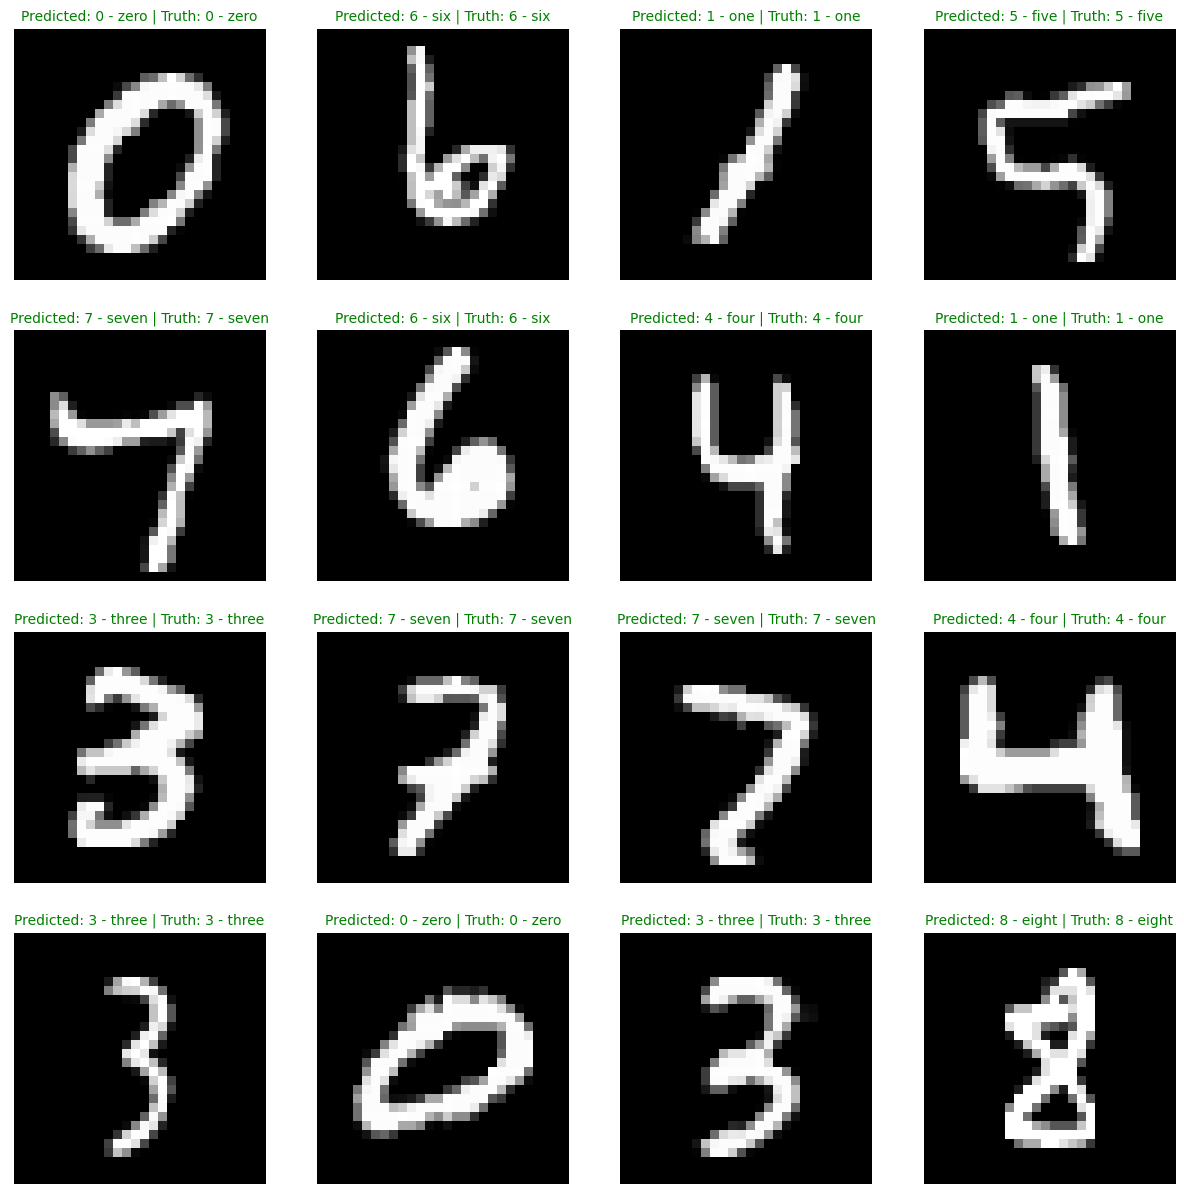

In [33]:
# Plot Predictions
plt.figure(figsize=(15,15))
nrows = 4
ncols = 4

for i, data_sample in enumerate(random_data):
  # Unpack data sample
  image, true_label, predicted_label = data_sample

  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(image.squeeze(), cmap='gray')

  # Find the predicted class name (in text form, e.g. 'Sandal')
  predicted_class_name = class_names[predicted_label]

  # Get the true class name (in text form)
  true_class_name = class_names[true_label]

  # Create a title for the plot
  title_text = f'Predicted: {predicted_class_name} | Truth: {true_class_name}'

  # Check for equality between pred and truth and change color of title text
  if predicted_class_name == true_class_name:
    title_color = 'g'
  else:
    title_color = 'r'

  # Plot the title
  plt.title(title_text, fontsize=10, c=title_color)

  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?